## Geometrical characteristics of a tapered and swept wing


In [56]:
%matplotlib inline
%run ./resources/init.py

Let us assign the wing planform shape, i.e. let us assume given values of wing span $b$ and wing chord $c$ that due to the geometry equals both to $c_\mathrm{t}$ and $c_\mathrm{r}$ .

In [8]:
b=26.8
sweep_angle=27.5*math.pi/180
c_r=5.2
c_t=1.6
taper=c_t/c_r

These data gaves us the following wing shape:

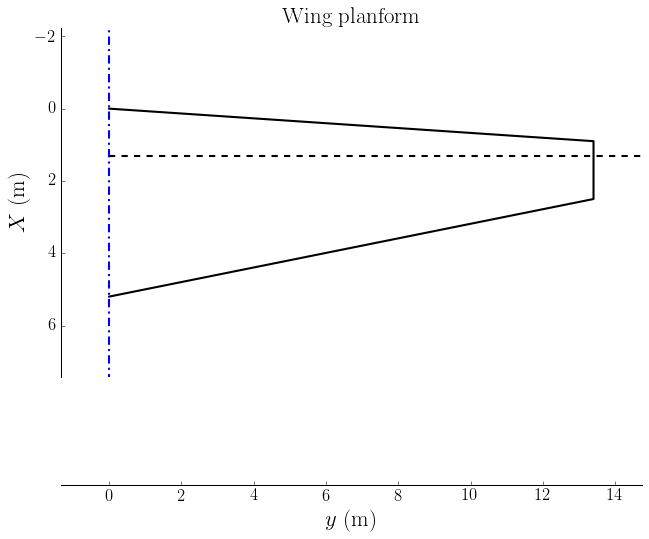

In [9]:
plot_planform(c_r, c_t, b)

In [10]:
Latex(
  r'\begin{array}{ll}'
     +  r'\text{Wing Span,}\, b: & ' + r'{0:.4}'.format(b) + r'\,\text{m}'
     +  r'\\'
     +  r'\text{Leading Edge Sweep Angle,}\, \Lambda_{\mathrm{le}}: & ' + r'{0:.3}'.format(sweep_angle) + r'\,\text{rad}'
     +  r'\\'
     +  r'\text{Root Chord,}\, c_r: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
     +  r'\\'
     +  r'\text{Tip Chord,}\, c_r: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
     + r'\\'
     + r'\text{Taper ratio,}\, \lambda: & ' + r'{0:.3}'.format(taper) + r'\,\text{m}'
  + r'\end{array}' )

<IPython.core.display.Latex object>

We can calculate now some geometric data depending on the assigned shape:
\begin{equation}
S,\,AR,\,\bar{c},\,\,X_\mathrm{le,\bar{c}},\,Y_\mathrm{\bar{c}}
\end{equation}

The law of the chord is:
\begin{equation}
c(Y)=A_cY+B_c
\end{equation}

In [14]:
A_c=2*(c_t-c_r)/b
B_c=c_r

We can calculate the coefficients of the chords law with the two following formulas  :

In [25]:
display_workflowACBC(c_t,c_r,A_c,B_c,b)

<IPython.core.display.Latex object>

So we have:

In [26]:
display(Math(r'c(y) =\,' + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

The Taper ratio is given by:


In [27]:
Latex( r'\begin{align*}'
         +r' \lambda = \dfrac{c_{\mathrm{t}}}{ c_{\mathrm{r}}}=' 
         +r'{0:.3}' .format(taper)
      +r'\end{align*}')

<IPython.core.display.Latex object>

The reference wing surface in this case is composed by 2 times the area of the trapezium with $c_t$ and $c_r$ as bases and $\dfrac{1}{2}b$ as height.
If we integrate the law $c(y)$ over the span we have again the value of $S$:

\begin{equation}
S= 2 \int_0^{b/2} c(y) \, \text{d}y = 2 \int_0^{b/2} \Big( A_c \, y + B_c \Big) \, \text{d}y 
\end{equation}

And by solving this integral we obtain :

In [41]:
S=integrate_S(A_c,B_c,b)[0]
Latex(r'$S = \,' + r'{0:.4}$'.format(S) + r'$\,\mathrm{m}^2$')

<IPython.core.display.Latex object>

Here it is displayed the full workflow:

In [42]:
c_law_integral_indefinite=integrate_S(A_c,B_c,b)[1]
display_workflow_S(b, A_c, B_c, c_law_integral_indefinite, S)

<IPython.core.display.Latex object>

And AR:

In [43]:
AR=(b*b)/S

In [44]:
display_workflowAR(b,S,AR)

<IPython.core.display.Latex object>

Let us calculate $\Lambda_\mathrm{c/4}$ , $\Lambda_\mathrm{c/2}$ and $\Lambda_\mathrm{te}$ by using the generic "n" formula :

\begin{equation}
\text{tan}\,\Lambda_{c/n} = \text{tan}\,\Lambda_{le}\,-\,\frac{(4/n)(1-\lambda)}{\text{AR}(1+\lambda)}
\end{equation}

In [64]:
tan_sweep_angle_c4 = tan(sweep_angle) -((4/4)*(1-taper))/(AR*(1+taper))
sweep_angle_c4=math.atan(tan_sweep_angle_c4)
tan_sweep_angle_c2 = tan(sweep_angle) -((4/2)*(1-taper))/(AR*(1+taper))
sweep_angle_c2=math.atan(tan_sweep_angle_c2)
tan_sweep_angle_te= tan(sweep_angle) -((4/1)*(1-taper))/(AR*(1+taper))
sweep_angle_te=math.atan(tan_sweep_angle_te)

In [65]:
Latex( r'\begin{array}{ll}'
         + r'\text{tan} \Lambda_{c/4}=\text{tan}('
         + r'{0:.3}' .format(sweep_angle)
         + r'\text{rad})- \dfrac{1\cdot(1-'
         + r'{0:.3}' .format(taper)
         + r')}{'
         + r'{0:.3}' .format(AR)
         + r'\cdot(1+'
         + r'{0:.3}' .format(taper)
         + r')}='
         + r'{0:.3}' .format(tan_sweep_angle_c4)
         + r'\,\Rightarrow\, \Lambda_{c/4}='
         + r'{0:.3}' .format(sweep_angle_c4)
         + r'\,\text{rad}'
         + r'\\'
         + r'\\'
         + r'\text{tan} \Lambda_{c/2}=\text{tan}('
         + r'{0:.3}' .format(sweep_angle)
         + r'\text{rad})- \dfrac{2\cdot(1-'
         + r'{0:.3}' .format(taper)
         + r')}{'
         + r'{0:.3}' .format(AR)
         + r'\cdot(1+'
         + r'{0:.3}' .format(taper)
         + r')}='
         + r'{0:.3}' .format(tan_sweep_angle_c2)
         + r'\,\Rightarrow\, \Lambda_{c/2}='
         + r'{0:.3}' .format(sweep_angle_c2)
         + r'\,\text{rad}'
         + r'\\'
         + r'\\'
         + r'\text{tan} \Lambda_{te}=\text{tan}('
         + r'{0:.3}' .format(sweep_angle)
         + r'\text{rad})- \dfrac{4\cdot(1-'
         + r'{0:.3}' .format(taper)
         + r')}{'
         + r'{0:.3}' .format(AR)
         + r'\cdot(1+'
         + r'{0:.3}' .format(taper)
         + r')}='
         + r'{0:.3}' .format(tan_sweep_angle_te)
         + r'\,\Rightarrow\, \Lambda_{te}='
         + r'{0:.3}' .format(sweep_angle_te)
         + r'\,\text{rad}'
       + r'\end{array}'
)

<IPython.core.display.Latex object>

From these results we can notice that the sweep angles of planform are gradually decreasing from leading edge  ($\Lambda_\mathrm{le}$), to the quarter-chord line ($\Lambda_\mathrm{c/4}$), the middle line ($\Lambda_\mathrm{c/2}$), and finally the trailing edge ($\Lambda_\mathrm{te}$). 

Let us calculate the value of the mean aerodinamic chord :


In [45]:
c_mean= (2/3)*c_r*(1+taper+(taper)*(taper))/(1+taper)

In [48]:
display_workflowc_mean(c_r,taper,c_mean)

<IPython.core.display.Latex object>

Naturally this is an intermediate value between the root and tip chord.

Let us now calculate the logitudinal distance from the leading edge of the mean aerodinamic chord to the one of the root chord.

\begin{equation}
X_{le,\bar{c}} = \frac{b}{6}\,\frac{ 1 + 2\lambda}{1+\lambda}\,\tan{\Lambda_{le}}
\end{equation}

In [51]:
tan_lambda = math.tan(sweep_angle)
x_lec=(b/6)*((1+2*taper)/(1+taper))*tan_lambda

In [53]:
display_workflowXlec(b,taper,tan_lambda,x_lec)

<IPython.core.display.Latex object>

 It is noted that for a tapered and swept wing , you have a non-zero $X_\mathrm{le,\bar{c}}$ . This means that the projection on the middle plane of the wing section having $\bar{c}$ as chord value is positioned  behind the root chord, $c_\mathrm{r}$.  Also , given the previously calculated value of $\bar{c}$, this projection is not all within the root chord but has a trailing edge at $ X_\mathrm{le,\bar{c}} + \bar{c} > c_\mathrm{r}$ .

Let us calculate now the distance, computed from wing root, of the mean aerodinamic chord station .
\begin{equation}
Y_{\bar{c}} = \frac{b}{6} \frac{1+2\lambda}{1+\lambda}
\end{equation}


In [57]:
y_lec=(b/6)*((1+2*taper)/(1+taper))
display_workflowYlec(b,taper,tan_lambda,y_lec)

<IPython.core.display.Latex object>

The point $\big(X_\mathrm{le,\bar{c}} ,0 \big)$ is of an extreme importance in the formulation of the equations of pitch and of static equilibrium stability condition to pitch of the aircraft. This point is taken as a reference by the designers to evaluate the position of the Centre of gravity and the position of the aerodynamic characteristic centres of the aircraft.